%%HTML
<link rel="stylesheet" type="text/css" href="style.css">

In [2]:
# importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from scipy import stats

<h2>Alessio Nicodemo, matricola : 166972</h2>
<h1><strong>Fondamenti Di Scienza Dei Dati E Laboratorio</stromg></h1>
<h3>Modulo: <strong > Presentazione del progetto</strong></h3>  
<h3>Titolo: <strong style = "color : #FFA500";> Crimini denunciati in Italia </strong></h3>


<h2><strong>1. Fondamenti del progetto</strong></h2>

<h3><strong>Motivazione della scelta</strong></h3>
<ul>
  <li>Interesse personale</li>
  <li>Rilevanza e attualità del tema</li>
</ul>

<h3><strong>Oggetto dello studio</strong></h3>
<ul>
  <li>Andamento negli anni</li>
  <li>Distribuzione geografica</li>
  <li>Frequenza</li>
  <li>Correlazioni</li>
</ul>

<h2><strong>2. Descrizione dei dati</strong></h2>

<img src="image/MinisteroInterno.svg" alt="Logo Ministero dell'Interno" style="height: 80px; vertical-align: middle;">

<p> Dati sui crimini denunciati a livello regionale e provinciale dal 2016 al 2023, comprendendo:</p>
<ul>
        <li>Numero di denunce</li>
        <li>Tipologia di reato</li>
        <li>Luogo di avvenimento</li>
</ul>
<p> Dataset reperibile 
    <a href="https://ucs.interno.gov.it/ucs/contenuti/Numero_dei_delitti_denunciati_all_autorit_agrave_giudiziaria_dalle_forze_di_polizia_int_00062-7730889.htm" target="_blank">
        qui
    </a>
</p>


<img src="image/istat.png" alt="Logo Istat" style="height: 90px; vertical-align: middle;">

<p> Dati sulla popolazione a livello provinciale nel 2022, includendo:</p>
<ul>
        <li>Numero di residenti in Italia censiti al 1° gennaio</li>
        <li>Reddito medio pro capite (in euro)</li>
        <li>Tasso di disoccupazione (15 - 64 anni)</li>
</ul>

<p> Dataset reperibile 
    <a href="https://esploradati.istat.it/databrowser/#/" target="_blank">
        qui
    </a>
</p>

<h3>
  <strong style="color: #F8C471;">GADM maps and data</strong>
  <img src="image/gadm.png" alt="Logo GADM" style="height: 90px; vertical-align: middle; margin-left: 10px;">
</h3>

<p>Spatial data dell'Italia a livello regionale, reperibili
    <a href="https://gadm.org/maps/ITA.html" target="_blank"> qui</a> 
</p>

<h2><strong>3. Analisi</strong></h2>

<h3><strong>Domande</strong></h3>
<p>L'analisi è basata sui dati del 2022, eccetto dove diversamente indicato:</p>
<ul>
    <li><strong>3.1 Quale tipo di crimine presenta una variazione più significativa tra il 2016 e il 2023?<strong></li>
    <ul>
            <li>Quali crimini all'interno della categoria hanno registrato questo cambiamento?</li>
    </ul>
    <li><strong>3.2 Dove vengono denunciati più reati a livello regionale?<strong></li>
    <li><strong>3.3 Quali sono i crimini più comuni per macroarea?<strong></li>
    <li><strong>3.4 Quali correlazioni ci sono con il numero di delitti denunciati a livello provinciale?<strong></li>
    <ul>
            <li>Popolazione, densità demografica?</li>
            <li>Fattori economici, tasso di disoccupazione e il reddito medio pro capite?</li>
    </ul>
</ul>

<h2><strong>3.1 Andamento dei crimini</strong></h2>

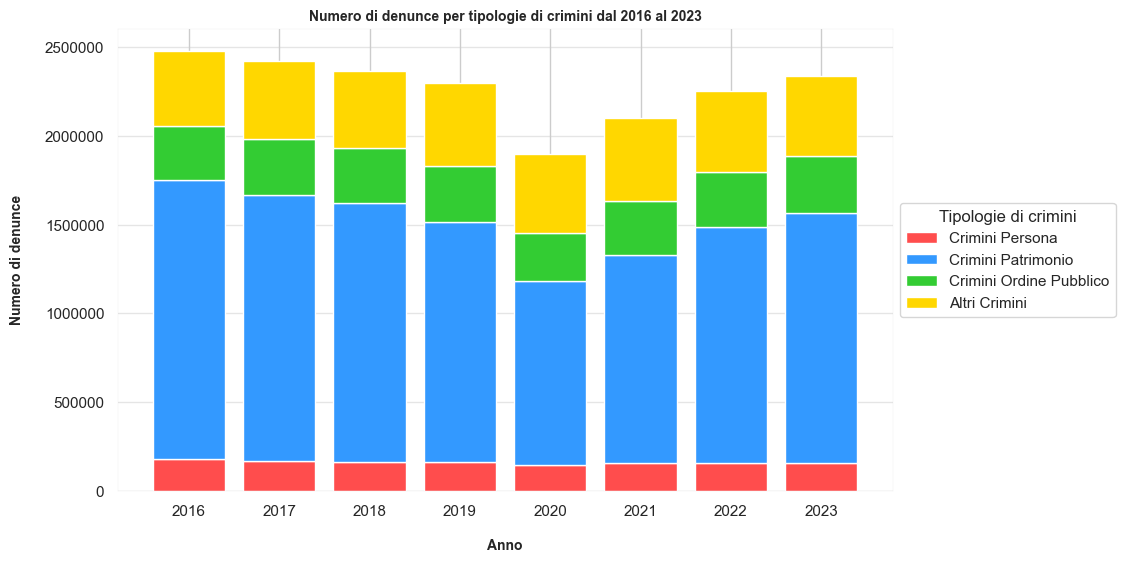

In [3]:
# lista degli anni 
anni = list(range(2016, 2024))

# lista vuota per contenere i DataFrame di ogni anno
df_list = []

# ciclo per leggere e processare gli Excel per ogni anno
for anno in anni:
    # costruisce il percorso del file in base all'anno
    file_path = f'Dataset/DelittiDenunciati_{anno}.xlsx'
    
    # legge il file Excel, foglio 'DenunceStato'
    df = pd.read_excel(file_path, 'DenunceStato')
    
    # rimuove le righe o colonne che contengono valori mancanti (NaN)
    df.dropna(inplace = True)
    
    # nuova colonna 'ANNO' per identificare l'anno nel DataFrame
    df['ANNO'] = anno
    
    # converte le colonne prese dal dataset in interi
    df['Crimini Persona'] = df['Crimini contro la persona'].astype(int)
    df['Crimini Patrimonio'] = df['Crimini contro il patrimonio'].astype(int)
    df['Crimini Ordine Pubblico'] = df['Crimini contro ordine pubblico e sicurezza'].astype(int)
    df['Altri Crimini'] = df['Altri Crimini'].astype(int)
    
    # aggiunge il DataFrame processato alla lista
    df_list.append(df[['ANNO', 'Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico', 'Altri Crimini']])

# unione di tutti i DataFrame in un unico DataFrame
df_unito = pd.concat(df_list, ignore_index = True)

# crea il grafico a barre sovrapposte
plt.figure(figsize = (10, 6))

# inizializza la base per le barre sovrapposte
bottom = np.zeros(len(anni))

# categorie di crimini e rispettivi colori
categorie_crimini = ['Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico',  'Altri Crimini']
colori = ['#ff4d4d', '#3399ff', '#33cc33', '#ffd700']

# loop per ogni categoria di crimine
for i, categoria in enumerate(categorie_crimini):
    plt.bar(df_unito['ANNO'], df_unito[categoria], bottom = bottom, label = categoria, color = colori[i])
    bottom += df_unito[categoria]

# Imposta il formato non scientifico sull'asse y
ax = plt.gca()  # Ottieni l'oggetto Axes corrente
ax.get_yaxis().get_major_formatter().set_scientific(False)

# titolo e etichette agli assi
plt.title('Numero di denunce per tipologie di crimini dal 2016 al 2023', fontsize=10, fontweight = 'bold')
plt.xlabel('Anno', labelpad = 15, fontsize = 10, fontweight = 'bold')
plt.ylabel('Numero di denunce', labelpad = 15, fontsize=10, fontweight = 'bold')

# aggiunge la legenda a destra
plt.legend(title = 'Tipologie di crimini', loc = 'center left', bbox_to_anchor = (1, 0.5))

# rimuovi il bordo grassetto attorno al grafico
ax.spines['top'].set_linewidth(0.1)  # Rimuove il bordo superiore
ax.spines['right'].set_linewidth(0.1)  # Rimuove il bordo destro
ax.spines['left'].set_linewidth(0.1)   # Imposta la larghezza del bordo sinistro
ax.spines['bottom'].set_linewidth(0.1)  # Imposta la larghezza del bordo inferiore

# griglia per rendere più leggibile il grafico
plt.grid(True, axis = 'y', alpha=0.5)

# mostra il grafico
plt.show()

<h2><strong>3.1 Confronto dei crimini</strong></h2>

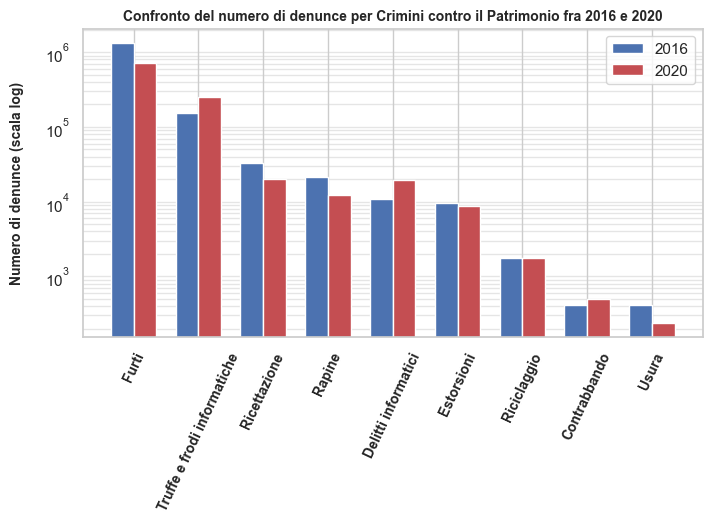

In [11]:
# legge i file Excel, foglio 'LegendaCriminiStato', crimini contro il patrimonio
df_delitti_2016 = pd.read_excel('Dataset/DelittiDenunciati_2016.xlsx', 'LegendaCriminiStato', skiprows=21, usecols="AB, AN, AO, AY, AZ, BF, BG, BL, BW")
df_delitti_2020 = pd.read_excel('Dataset/DelittiDenunciati_2020.xlsx', 'LegendaCriminiStato', skiprows=21, usecols="AB, AN, AO, AY, AZ, BF, BG, BL, BW")

# rimuove le righe con valori mancanti (NaN)
df_delitti_2016.dropna(inplace=True)
df_delitti_2020.dropna(inplace=True)

# aggiunge una colonna per indicare l'anno nei rispettivi DataFrame
df_delitti_2016['Anno'] = 2016
df_delitti_2020['Anno'] = 2020

# rinomina le colonne in modo che siano coerenti tra i due DataFrame
df_delitti_2016.columns = ['Furti', 'Rapine', 'Ricettazione', 'Estorsioni', 'Usura', 'Riciclaggio', 'Truffe e frodi informatiche', 'Contrabbando', 'Delitti informatici', 'Anno']
df_delitti_2020.columns = ['Furti', 'Rapine', 'Ricettazione', 'Estorsioni', 'Usura', 'Riciclaggio', 'Truffe e frodi informatiche', 'Contrabbando', 'Delitti informatici', 'Anno']

# unione dei due DataFrame mantenendo separati i dati dei due anni
df_confronto = pd.concat([df_delitti_2016, df_delitti_2020])

# imposta la lista dei crimini per l'asse X
crimini = ['Furti', 'Rapine', 'Ricettazione', 'Estorsioni', 'Usura', 'Riciclaggio', 'Truffe e frodi informatiche', 'Contrabbando', 'Delitti informatici']

# Somma delle denunce per ogni crimine nei due anni
somme_crimini = df_confronto[crimini].sum().sort_values(ascending=False)

# Ordina i crimini in base al numero totale di denunce
crimini_ordinati = somme_crimini.index.tolist()

# Reimposta i dati nei DataFrame in base all'ordine dei crimini ordinati
df_delitti_2016_ordinati = df_delitti_2016[crimini_ordinati]
df_delitti_2020_ordinati = df_delitti_2020[crimini_ordinati]

# Imposta il tema di Seaborn
sns.set(style="whitegrid")

# Crea il grafico aggiornato
plt.figure(figsize=(8, 4))

# Larghezza delle barre
bar_width = 0.35

# Posizioni delle barre per il 2016 e 2020
indices = np.arange(len(crimini_ordinati))

# Crea le barre per il 2016
plt.bar(indices - bar_width / 2, df_delitti_2016_ordinati.iloc[0], bar_width, label='2016', color='b')

# Crea le barre per il 2020
plt.bar(indices + bar_width / 2, df_delitti_2020_ordinati.iloc[0], bar_width, label='2020', color='r')

# Imposta l'asse Y in scala logaritmica
plt.yscale('log')

# Aggiunge titolo e etichette
plt.title('Confronto del numero di denunce per Crimini contro il Patrimonio fra 2016 e 2020', fontsize=10, fontweight='bold')
plt.ylabel('Numero di denunce (scala log)', labelpad=15, fontsize=10, fontweight='bold')
plt.xticks(indices, crimini_ordinati, rotation=65, fontsize=10, fontweight='bold')  # Usa i crimini ordinati
plt.legend()

# Griglia per rendere più leggibile il grafico
plt.grid(True, axis='y', alpha=0.5, which="both")  # Griglia su scala logaritmica

# Mostriamo il grafico
plt.show()

<h2><strong>3.2 Distribuzione dei reati</strong></h2>

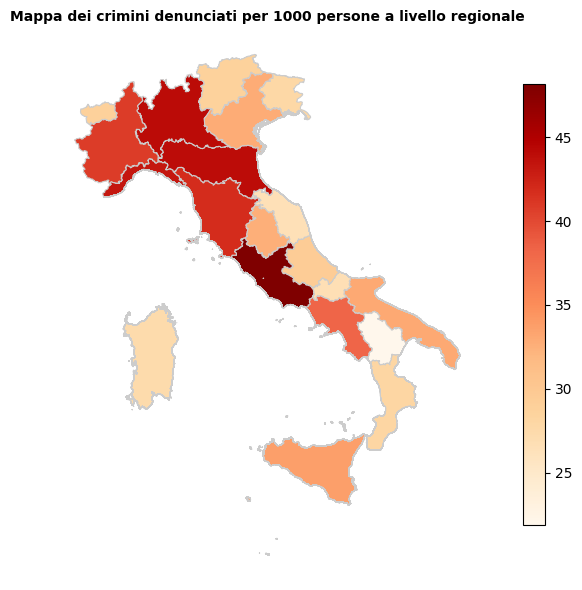

In [5]:
# Legge i dati sui delitti denunciati per regione
delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows=21, usecols="A, AN")

# Legge i dati sulla popolazione per regione
popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneRegionale', usecols=["Territorio  ", "Totale Popolazione"])

# Rinomina le colonne per uniformità
popolazione.rename(columns={'Territorio  ': 'Regione'}, inplace=True)

# Converte i nomi dei territori in maiuscolo per una corretta corrispondenza
delitti['Regione'] = delitti['Regione'].str.upper()
popolazione['Regione'] = popolazione['Regione'].str.upper()

# Rimuove eventuali spazi superflui nei nomi delle regioni
popolazione['Regione'] = popolazione['Regione'].str.strip()

# Unisce i dataset dei delitti e della popolazione sulla colonna 'Regione'
df_merged = pd.merge(delitti, popolazione, on='Regione')

# Calcola i delitti per ogni 1000 persone
df_merged['Delitti per 1000 persone'] = (df_merged['Totale'] / df_merged['Totale Popolazione']) * 1000

# Carica il file shapefile delle regioni italiane
shapefile_regioni = gpd.read_file('Italy_shapefile/gadm41_ITA_1.shp')

# Corregge i nomi delle regioni nel shapefile per farli corrispondere ai nomi nel DataFrame
shapefile_regioni['NAME_1'] = shapefile_regioni['NAME_1'].replace({
    'Apulia': 'PUGLIA',  
    'Sicily': 'SICILIA'
})

# Rinomina la colonna 'NAME_1' in 'Regione' per allineare i nomi delle regioni
shapefile_regioni.rename(columns={'NAME_1': 'Regione'}, inplace=True)

# Trasforma i nomi delle regioni del shapefile in maiuscolo per una corretta corrispondenza
shapefile_regioni['Regione'] = shapefile_regioni['Regione'].str.upper()

# Unisce il GeoDataFrame con il DataFrame dei delitti e della popolazione
dfshape = shapefile_regioni.merge(df_merged, on='Regione')

# Imposta la figura e l'asse per visualizzare la mappa
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# Crea la mappa colorata per "Delitti per 1000 persone"
dfshape.plot(column='Delitti per 1000 persone',  # colonna aggiornata
             cmap='OrRd',  # Colormap per una visualizzazione graduale
             linewidth=0.8,  # Spessore del contorno delle regioni
             ax=ax,  # Asse su cui disegnare la mappa
             edgecolor='0.8',  # Colore dei bordi delle regioni
             legend=False)  # Nasconde la legenda (opzionale)

# Crea una barra dei colori (colorbar)
sm = plt.cm.ScalarMappable(cmap='OrRd', 
                           norm=plt.Normalize(vmin=dfshape['Delitti per 1000 persone'].min(), 
                                              vmax=dfshape['Delitti per 1000 persone'].max()))
sm._A = []  # Necessario per ScalarMappable
cbar = fig.colorbar(sm, ax=ax, shrink=0.8)  # Riduce la colorbar senza influire sulla dimensione della mappa

# Rimuove la griglia dall'asse
ax.grid(False)
ax.set_axis_off()

# Titolo
plt.title('Mappa dei crimini denunciati per 1000 persone a livello regionale', fontsize=10, fontweight='bold')

# Mostra la mappa
plt.tight_layout()
plt.show()

<h2><strong>3.3 Tipologie di crimini per macroarea</strong></h2>

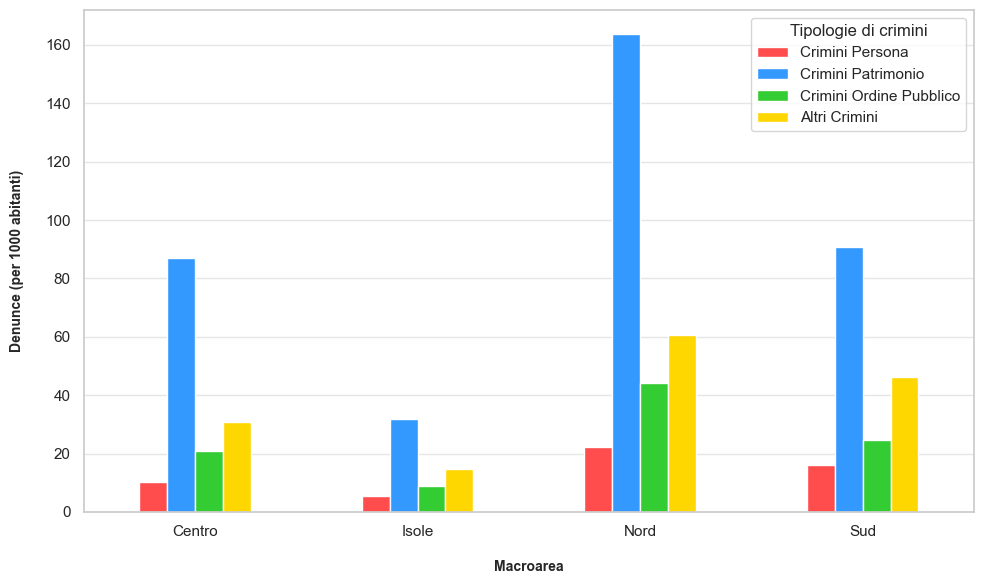

In [14]:
# Definisce i colori per ciascuna categoria di crimine
categorie_crimini = ['Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico', 'Altri Crimini']
colori = ['#ff4d4d', '#3399ff', '#33cc33', '#ffd700']

# Legge i dati dei delitti
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows=21)

# Legge i dati sulla popolazione per regione
popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneRegionale', usecols=["Territorio  ", "Totale Popolazione"])
popolazione.columns = ['Regione', 'Popolazione']  # Rinomina le colonne per uniformità

# Rimuove eventuali spazi in eccesso nei nomi delle regioni
popolazione['Regione'] = popolazione['Regione'].str.strip()

# Unisce i dati dei delitti con quelli della popolazione
df_delitti = pd.merge(df_delitti, popolazione, how='left', left_on='Regione', right_on='Regione')

# Definisce il dizionario che associa ogni regione alla sua macro-area
macro_area = {
    'Piemonte': 'Nord',
    'Valle d\'Aosta': 'Nord',
    'Lombardia': 'Nord',
    'Trentino-Alto Adige': 'Nord',
    'Veneto': 'Nord',
    'Friuli-Venezia Giulia': 'Nord',
    'Liguria': 'Nord',
    'Emilia-Romagna': 'Nord',
    'Toscana': 'Centro',
    'Umbria': 'Centro',
    'Marche': 'Centro',
    'Lazio': 'Centro',
    'Abruzzo': 'Sud',
    'Molise': 'Sud',
    'Campania': 'Sud',
    'Puglia': 'Sud',
    'Basilicata': 'Sud',
    'Calabria': 'Sud',
    'Sicilia': 'Isole',
    'Sardegna': 'Isole'
}

# Aggiunge una nuova colonna 'Macro-area' basata sulla regione
df_delitti['MacroArea'] = df_delitti['Regione'].map(macro_area)

# Seleziona solo le colonne rilevanti per il conteggio delle tipologie di crimini
tipologie_crimini = ['Persona', 'Patrimonio', 'Pubblico', 'Altro']

# Normalizza i dati per 1000 abitanti
for crimine in tipologie_crimini:
    df_delitti[crimine] = (df_delitti[crimine] / df_delitti['Popolazione']) * 1000

# Raggruppa i dati per 'Macro-area' e somma i valori normalizzati per ogni tipologia di crimine
df_grouped = df_delitti.groupby('MacroArea')[tipologie_crimini].sum()

# Rinomina le colonne per una migliore leggibilità nel grafico
df_grouped.columns = categorie_crimini

# Crea il grafico a barre raggruppato
ax = df_grouped.plot(kind='bar', figsize=(10, 6), color=colori)

# Aggiunge titolo e etichette
plt.xlabel('Macroarea', labelpad=15, fontsize=10, fontweight='bold')
plt.ylabel('Denunce (per 1000 abitanti)', labelpad=15, fontsize=10, fontweight='bold')
plt.xticks(rotation=0)  # Mantiene le etichette delle macro-aree orizzontali
plt.grid(True, axis='y', alpha=0.5)

# Crea la legenda con un titolo
legend = ax.legend(title="Tipologie di crimini", loc='upper right')
# Toglie barra y
plt.gca().xaxis.grid(False)

# Mostra il grafico
plt.tight_layout()
plt.show()

<h2><strong>3.3 Crimini più diffusi nel Nord Italia</strong></h2>

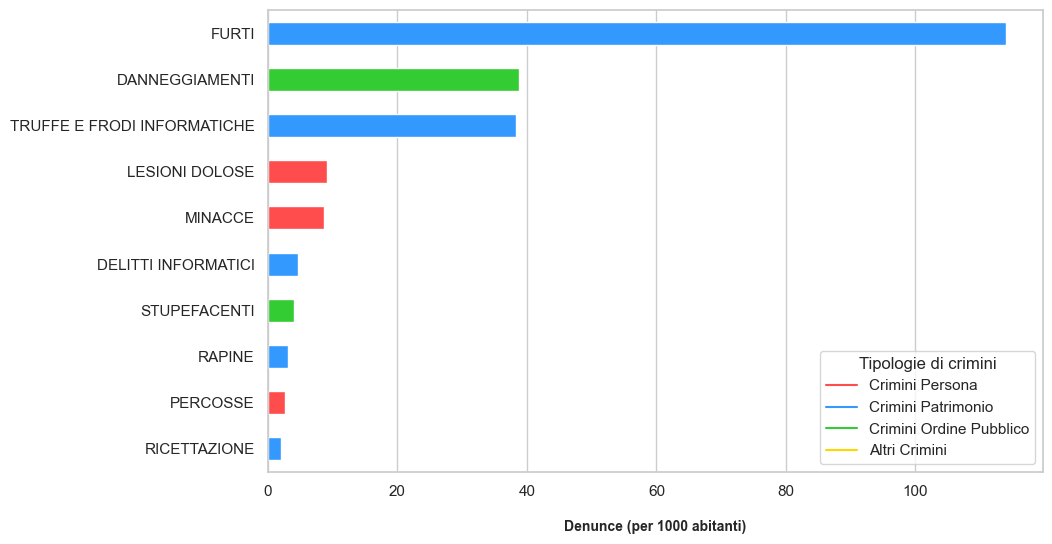

In [7]:
# Legge il file Excel, foglio 'DenunceRegionali', saltando le note
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows=21)

# Legge il file della popolazione regionale
popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneRegionale', usecols=["Territorio  ", "Totale Popolazione"])
popolazione.columns = ['Regione', 'Popolazione']  # Rinomina le colonne per uniformità
popolazione['Regione'] = popolazione['Regione'].str.strip()  # Rimuove spazi extra

# Filtra i dati per le regioni del Nord Italia
regioni_nord = ['Piemonte', 'Valle d\'Aosta', 'Lombardia', 'Trentino-Alto Adige', 'Veneto', 'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna']
df_regioni_nord = df_delitti[df_delitti['Regione'].isin(regioni_nord)]

# Unisce il dataset dei delitti con quello della popolazione
df_regioni_nord = pd.merge(df_regioni_nord, popolazione, how='left', on='Regione')

# Rimuove le colonne da escludere dal DataFrame
colonne_da_escludere = ['Persona', 'Patrimonio', 'Pubblico', 'Altro', 'Totale', 'ALTRI DELITTI']
df_crimini_nord = df_regioni_nord.drop(columns=colonne_da_escludere)

# Converte i valori delle colonne in numerici, forzando i non numerici a NaN
df_crimini_nord = df_crimini_nord.apply(pd.to_numeric, errors='coerce')
# Riempie i valori NaN con 0
df_crimini_nord.fillna(0, inplace=True)

# Normalizza i crimini per 1000 abitanti
df_crimini_nord_normalizzati = df_crimini_nord.iloc[:, 1:-1].div(df_crimini_nord['Popolazione'], axis=0) * 1000

# Somma i crimini normalizzati in ogni colonna per tutte le regioni selezionate
sums_nord = df_crimini_nord_normalizzati.sum()

# Ordina i crimini dal maggiore al minore
sums_nord_sorted = sums_nord.sort_values(ascending=False)

# Mostra solo i primi 10 crimini
sums_nord_comuni = sums_nord_sorted.head(10)

# Crea una mappatura per i colori dei crimini specifici
color_map = {
    'furti': '#3399ff',           
    'danneggiamenti': '#33cc33',      
    'truffe e frodi informatiche': '#3399ff', 
    'lesioni dolose': '#ff4d4d',      
    'minacce': '#ff4d4d',             
    'delitti informatici': '#3399ff', 
    'rapine': '#3399ff',              
    'stupefacenti': '#33cc33',       
    'percosse': '#ff4d4d',            
    'ricettazione': '#3399ff'         
}

# Applica i colori ai crimini, se non lo trova gli mette un colore standard
colori_comuni = [color_map.get(crimine.lower(), '#ffd700') for crimine in sums_nord_comuni.index]

# Imposta il tema di Seaborn
sns.set(style="whitegrid")

# Crea il grafico a barre orizzontali con i colori specifici e mette prima i crimini grandi
plt.figure(figsize=(10, 6))
sums_nord_comuni.plot(kind='barh', color=colori_comuni)

# Inverte l'asse Y per mostrare i crimini maggiori in alto
plt.gca().invert_yaxis()

# Aggiunge titolo e etichette agli assi
plt.xlabel('Denunce (per 1000 abitanti)', labelpad=15, fontsize=10, fontweight='bold')

# Aggiunge la leggenda
legend_labels = ['Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico', 'Altri Crimini']
legend_colors = ['#ff4d4d', '#3399ff', '#33cc33', '#ffd700']
for label, color in zip(legend_labels, legend_colors):
    plt.plot([], [], color=color, label=label)

# Modifica la grandezza dei colori nella legenda
plt.legend(title='Tipologie di crimini') 
plt.gca().yaxis.grid(False)

# Mostra il grafico
plt.show()

<h2><strong>3.3 Crimini più diffusi nel Centro Italia</strong></h2>

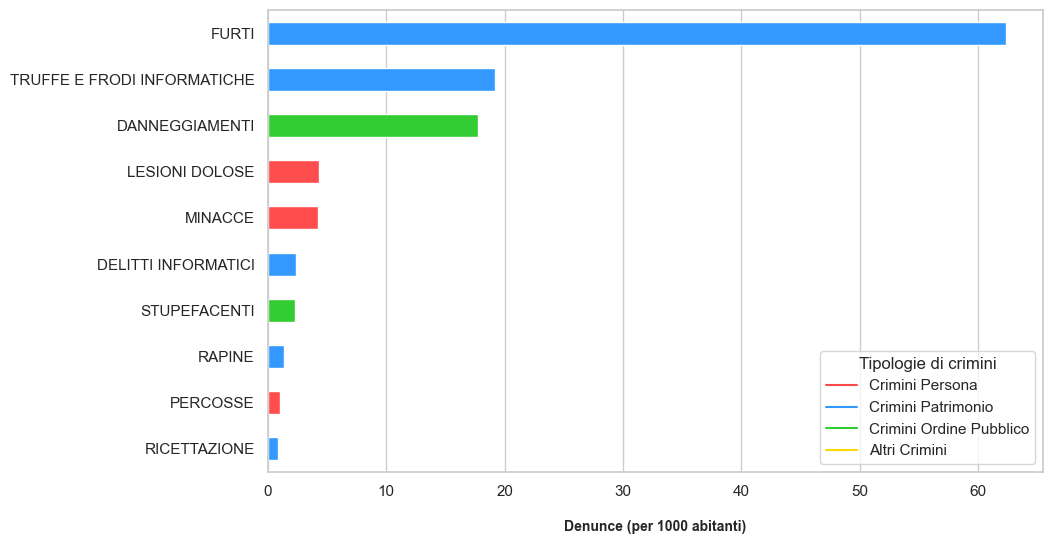

In [8]:

# Legge il file Excel, foglio 'DenunceRegionali', saltando le note
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows=21)

# Legge il file della popolazione regionale
popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneRegionale', usecols=["Territorio  ", "Totale Popolazione"])
popolazione.columns = ['Regione', 'Popolazione']  # Rinomina le colonne per uniformità
popolazione['Regione'] = popolazione['Regione'].str.strip()  # Rimuove spazi extra

# Filtra i dati per le regioni del Nord Italia
regioni_centro = ['Toscana', 'Umbria', 'Marche', 'Lazio']
df_regioni_centro = df_delitti[df_delitti['Regione'].isin(regioni_centro)]

# Unisce il dataset dei delitti con quello della popolazione
df_regioni_centro = pd.merge(df_regioni_centro, popolazione, how='left', on='Regione')

# Rimuove le colonne da escludere dal DataFrame
colonne_da_escludere = ['Persona', 'Patrimonio', 'Pubblico', 'Altro', 'Totale', 'ALTRI DELITTI']
df_crimini_centro = df_regioni_centro.drop(columns=colonne_da_escludere)

# Converte i valori delle colonne in numerici, forzando i non numerici a NaN
df_crimini_centro = df_crimini_centro.apply(pd.to_numeric, errors='coerce')
# Riempie i valori NaN con 0
df_crimini_centro.fillna(0, inplace=True)

# Normalizza i crimini per 1000 abitanti
df_crimini_centro_normalizzati = df_crimini_centro.iloc[:, 1:-1].div(df_crimini_centro['Popolazione'], axis=0) * 1000

# Somma i crimini normalizzati in ogni colonna per tutte le regioni selezionate
sums_centro = df_crimini_centro_normalizzati.sum()

# Ordina i crimini dal maggiore al minore
sums_centro_sorted = sums_centro.sort_values(ascending=False)

# Mostra solo i primi 10 crimini
sums_centro_comuni = sums_centro_sorted.head(10)

# Crea una mappatura per i colori dei crimini specifici
color_map = {
    'furti': '#3399ff',           
    'danneggiamenti': '#33cc33',      
    'truffe e frodi informatiche': '#3399ff', 
    'lesioni dolose': '#ff4d4d',      
    'minacce': '#ff4d4d',             
    'delitti informatici': '#3399ff', 
    'rapine': '#3399ff',              
    'stupefacenti': '#33cc33',       
    'percosse': '#ff4d4d',            
    'ricettazione': '#3399ff'         
}

# Applica i colori ai crimini, se non lo trova gli mette un colore standard
colori_comuni = [color_map.get(crimine.lower(), '#ffd700') for crimine in sums_centro_comuni.index]

# Imposta il tema di Seaborn
sns.set(style="whitegrid")

# Crea il grafico a barre orizzontali con i colori specifici e mette prima i crimini grandi
plt.figure(figsize=(10, 6))
sums_centro_comuni.plot(kind='barh', color=colori_comuni)

# Inverte l'asse Y per mostrare i crimini maggiori in alto
plt.gca().invert_yaxis()

# Aggiunge titolo e etichette agli assi
plt.xlabel('Denunce (per 1000 abitanti)', labelpad=15, fontsize=10, fontweight='bold')

# Aggiunge la leggenda
legend_labels = ['Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico', 'Altri Crimini']
legend_colors = ['#ff4d4d', '#3399ff', '#33cc33', '#ffd700']
for label, color in zip(legend_labels, legend_colors):
    plt.plot([], [], color=color, label=label)

# Modifica la grandezza dei colori nella legenda
plt.legend(title='Tipologie di crimini') 
plt.gca().yaxis.grid(False)

# Mostra il grafico
plt.show()

<h2><strong>3.3 Crimini più diffusi nel Sud Italia</strong></h2>

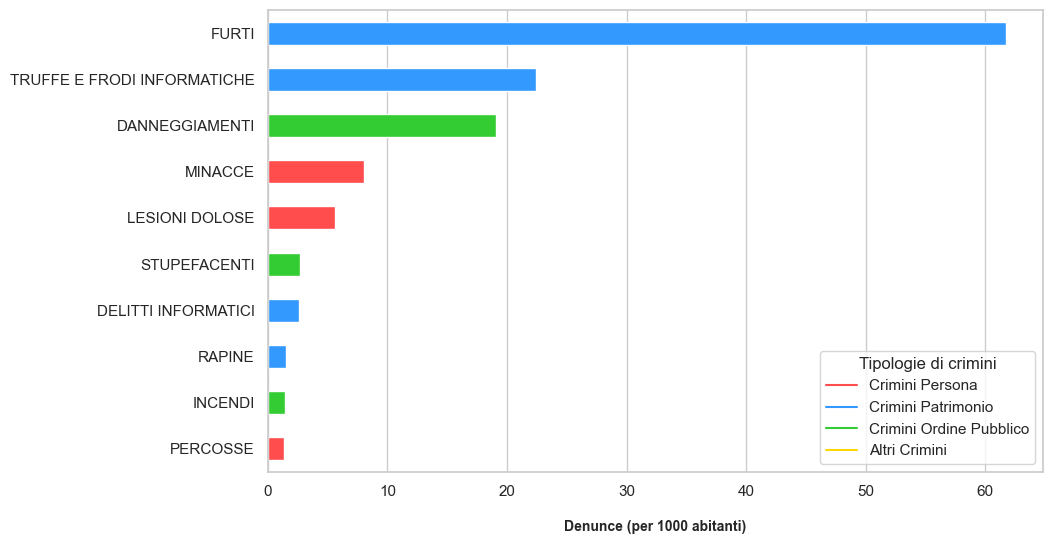

In [9]:
# Legge il file Excel, foglio 'DenunceRegionali', saltando le note
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows=21)

# Legge il file della popolazione regionale
popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneRegionale', usecols=["Territorio  ", "Totale Popolazione"])
popolazione.columns = ['Regione', 'Popolazione']  # Rinomina le colonne per uniformità
popolazione['Regione'] = popolazione['Regione'].str.strip()  # Rimuove spazi extra

# Filtra i dati per le regioni del Sud Italia 
regioni_sud = ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria']
df_regioni_sud = df_delitti[df_delitti['Regione'].isin(regioni_sud)]

# Unisce il dataset dei delitti con quello della popolazione
df_regioni_sud = pd.merge(df_regioni_sud, popolazione, how='left', on='Regione')

# Rimuove le colonne da escludere dal DataFrame
colonne_da_escludere = ['Persona', 'Patrimonio', 'Pubblico', 'Altro', 'Totale', 'ALTRI DELITTI']
df_crimini_sud = df_regioni_sud.drop(columns=colonne_da_escludere)

# Converte i valori delle colonne in numerici, forzando i non numerici a NaN
df_crimini_sud = df_crimini_sud.apply(pd.to_numeric, errors='coerce')
# Riempie i valori NaN con 0
df_crimini_sud.fillna(0, inplace=True)

# Normalizza i crimini per 1000 abitanti
df_crimini_sud_normalizzati = df_crimini_sud.iloc[:, 1:-1].div(df_crimini_sud['Popolazione'], axis=0) * 1000

# Somma i crimini normalizzati in ogni colonna per tutte le regioni selezionate
sums_sud = df_crimini_sud_normalizzati.sum()

# Ordina i crimini dal maggiore al minore
sums_sud_sorted = sums_sud.sort_values(ascending=False)

# Mostra solo i primi 10 crimini
sums_sud_comuni = sums_sud_sorted.head(10)

# Crea una mappatura per i colori dei crimini specifici
color_map = {
    'furti': '#3399ff',           
    'danneggiamenti': '#33cc33',      
    'truffe e frodi informatiche': '#3399ff', 
    'lesioni dolose': '#ff4d4d',      
    'minacce': '#ff4d4d',             
    'delitti informatici': '#3399ff', 
    'rapine': '#3399ff',              
    'stupefacenti': '#33cc33',       
    'percosse': '#ff4d4d',            
    'incendi': '#33cc33'         
}

# Applica i colori ai crimini, se non lo trova gli mette un colore standard
colori_comuni = [color_map.get(crimine.lower(), '#ffd700') for crimine in sums_sud_comuni.index]

# Imposta il tema di Seaborn
sns.set(style="whitegrid")

# Crea il grafico a barre orizzontali con i colori specifici e mette prima i crimini grandi
plt.figure(figsize=(10, 6))
sums_sud_comuni.plot(kind='barh', color=colori_comuni)

# Inverte l'asse Y per mostrare i crimini maggiori in alto
plt.gca().invert_yaxis()

# Aggiunge titolo e etichette agli assi
plt.xlabel('Denunce (per 1000 abitanti)', labelpad=15, fontsize=10, fontweight='bold')

# Aggiunge la leggenda
legend_labels = ['Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico', 'Altri Crimini']
legend_colors = ['#ff4d4d', '#3399ff', '#33cc33', '#ffd700']
for label, color in zip(legend_labels, legend_colors):
    plt.plot([], [], color=color, label=label)

# Modifica la grandezza dei colori nella legenda
plt.legend(title='Tipologie di crimini') 
plt.gca().yaxis.grid(False)

# Mostra il grafico
plt.show()

<h2><strong>3.3 Crimini più diffusi nelle Isole italiane</strong></h2>

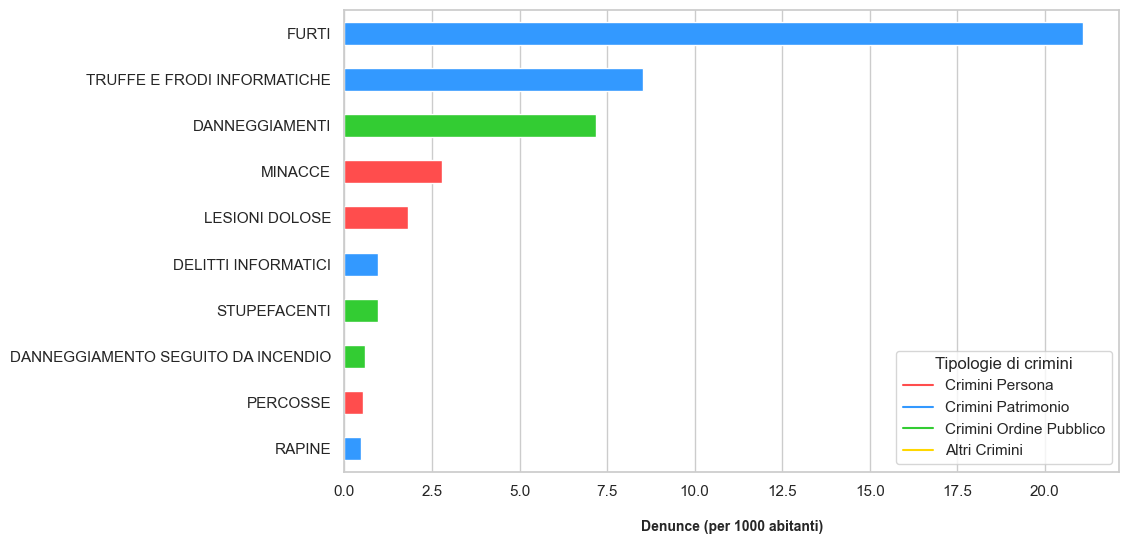

In [10]:
# Legge il file Excel, foglio 'DenunceRegionali', saltando le note
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows=21)

# Legge il file della popolazione regionale
popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneRegionale', usecols=["Territorio  ", "Totale Popolazione"])
popolazione.columns = ['Regione', 'Popolazione']  # Rinomina le colonne per uniformità
popolazione['Regione'] = popolazione['Regione'].str.strip()  # Rimuove spazi extra

# Filtra i dati per le regioni delle Isole Italiane
regioni_isole = ['Sicilia', 'Sardegna']
df_regioni_isole = df_delitti[df_delitti['Regione'].isin(regioni_isole)]

# Unisce il dataset dei delitti con quello della popolazione
df_regioni_isole = pd.merge(df_regioni_isole, popolazione, how='left', on='Regione')

# Rimuove le colonne da escludere dal DataFrame
colonne_da_escludere = ['Persona', 'Patrimonio', 'Pubblico', 'Altro', 'Totale', 'ALTRI DELITTI']
df_crimini_isole = df_regioni_isole.drop(columns=colonne_da_escludere)

# Converte i valori delle colonne in numerici, forzando i non numerici a NaN
df_crimini_isole = df_crimini_isole.apply(pd.to_numeric, errors='coerce')
# Riempie i valori NaN con 0
df_crimini_isole.fillna(0, inplace=True)

# Normalizza i crimini per 1000 abitanti
df_crimini_isole_normalizzati = df_crimini_isole.iloc[:, 1:-1].div(df_crimini_isole['Popolazione'], axis=0) * 1000

# Somma i crimini normalizzati in ogni colonna per tutte le regioni selezionate
sums_isole = df_crimini_isole_normalizzati.sum()

# Ordina i crimini dal maggiore al minore
sums_isole_sorted = sums_isole.sort_values(ascending=False)

# Mostra solo i primi 10 crimini
sums_isole_comuni = sums_isole_sorted.head(10)

# Crea una mappatura per i colori dei crimini specifici
color_map = {
    'furti': '#3399ff',           
    'danneggiamenti': '#33cc33',      
    'truffe e frodi informatiche': '#3399ff', 
    'lesioni dolose': '#ff4d4d',      
    'minacce': '#ff4d4d',             
    'delitti informatici': '#3399ff', 
    'rapine': '#3399ff',              
    'stupefacenti': '#33cc33',       
    'percosse': '#ff4d4d',            
    'danneggiamento seguito da incendio': '#33cc33'         
}

# Applica i colori ai crimini, se non lo trova gli mette un colore standard
colori_comuni = [color_map.get(crimine.lower(), '#ffd700') for crimine in sums_isole_comuni.index]

# Imposta il tema di Seaborn
sns.set(style="whitegrid")

# Crea il grafico a barre orizzontali con i colori specifici e mette prima i crimini grandi
plt.figure(figsize=(10, 6))
sums_isole_comuni.plot(kind='barh', color=colori_comuni)

# Inverte l'asse Y per mostrare i crimini maggiori in alto
plt.gca().invert_yaxis()

# Aggiunge titolo e etichette agli assi
plt.xlabel('Denunce (per 1000 abitanti)', labelpad=15, fontsize=10, fontweight='bold')

# Aggiunge la leggenda
legend_labels = ['Crimini Persona', 'Crimini Patrimonio', 'Crimini Ordine Pubblico', 'Altri Crimini']
legend_colors = ['#ff4d4d', '#3399ff', '#33cc33', '#ffd700']
for label, color in zip(legend_labels, legend_colors):
    plt.plot([], [], color=color, label=label)

# Modifica la grandezza dei colori nella legenda
plt.legend(title='Tipologie di crimini') 
plt.gca().yaxis.grid(False)

# Mostra il grafico
plt.show()

<h2><strong>3.3 Schema riassuntivo</strong></h2>

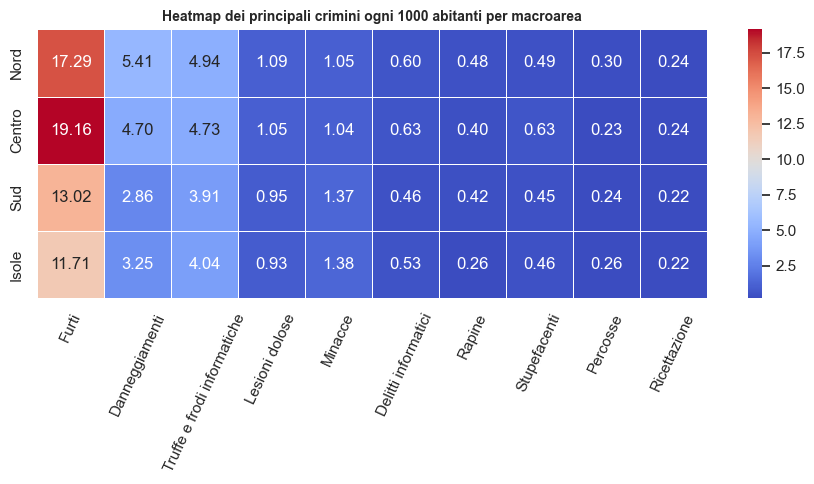

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricare i dati
data = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceRegionali', skiprows=21)

# Convertire i nomi delle colonne in minuscolo
data.columns = data.columns.str.lower()

# Aggiungere dati sulla popolazione (esempio: popolazione per regione)
popolazione_regionale = {
    'Piemonte': 4356406, 'Valle d\'aosta': 125666, 'Lombardia': 10060574, 'Trentino-Alto Adige': 1072276,
    'Veneto': 4905854, 'Friuli-Venezia Giulia': 1211357, 'Liguria': 1505821, 'Emilia-Romagna': 4467118,
    'Toscana': 3729641, 'Umbria': 859084, 'Marche': 1504713, 'Lazio': 5865544,
    'Abruzzo': 1293941, 'Molise': 296547, 'Campania': 5755709, 'Puglia': 3967555,
    'Basilicata': 556934, 'Calabria': 1912932, 'Sicilia': 4910179, 'Sardegna': 1639591
}
data['popolazione'] = data['regione'].map(popolazione_regionale)

# Definizione dei 10 crimini selezionati e delle macroaree
primi_10_crimini = ['furti', 'danneggiamenti', 'truffe e frodi informatiche', 'lesioni dolose', 'minacce',
                    'delitti informatici', 'rapine', 'stupefacenti', 'percosse', 'ricettazione']
primi_10_crimini_capitalized = [crimine.capitalize() for crimine in primi_10_crimini]

macroaree = {
    "Nord": ['Piemonte', 'Valle d\'aosta', 'Lombardia', 'Trentino-Alto Adige', 'Veneto', 'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna'],
    "Centro": ['Toscana', 'Umbria', 'Marche', 'Lazio'],
    "Sud": ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria'],
    "Isole": ['Sicilia', 'Sardegna']
}

# Definire la funzione PRIMA di applicarla
def get_macroarea(region):
    for area, regions in macroaree.items():
        if region in regions:
            return area
    return None

# Filtrare solo i crimini selezionati
data_filtered = data[["regione", "popolazione"] + primi_10_crimini].copy()
data_filtered.columns = ["regione", "popolazione"] + primi_10_crimini_capitalized

# Creare una colonna per le macroaree
data_filtered["macroarea"] = data_filtered["regione"].apply(get_macroarea)

# Aggregare i dati per macroarea e crimine
data_aggregated = data_filtered.groupby("macroarea").sum()

# Normalizzare i dati ogni 1000 abitanti
data_normalized = data_aggregated[primi_10_crimini_capitalized].div(data_aggregated["popolazione"], axis=0) * 1000

# Riordinare le macroaree
ordine_macroaree = ["Nord", "Centro", "Sud", "Isole"]
data_normalized = data_normalized.loc[ordine_macroaree]

# Creare la heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(data_normalized, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap dei principali crimini ogni 1000 abitanti per macroarea", fontsize=10, fontweight='bold')
plt.xticks(rotation=65)
plt.ylabel("")  
plt.tight_layout()
plt.show()

<h2><strong>3.4 Correlazione fra crimini e densità</strong></h2>
<ul>
    <li>Coefficiente di Pearson : 0.63, P-value : 3.19 × 10<sup>-13</sup></li>
</ul>

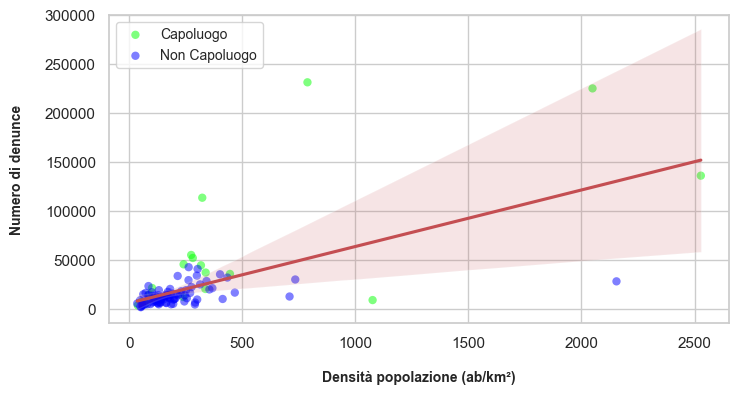

In [8]:
# carica i dati per le regioni e le province
df_popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneProvinciale')
    
# legge il file Excel, foglio 'DenunceStato'
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceProvinciali')
    
# rimuove le righe o colonne che contengono valori mancanti (NaN)
df_popolazione.dropna(inplace=True)
df_delitti.dropna(inplace=True)

# unisce i due dataframe 
df_province = pd.merge(df_popolazione, df_delitti)

# imposta il tema di Seaborn
sns.set(style="whitegrid")

# --- Primo grafico con margine di errore ---
plt.figure(figsize=(8, 4))

# Palette per capoluoghi / province
palette = {'SI': '#00FF00', 'NO': '#0000FF'}

# Filtra i dati per Capoluogo e Non Capoluogo
df_capoluoghi = df_province[df_province['Capoluogo'] == 'SI']
df_non_capoluoghi = df_province[df_province['Capoluogo'] == 'NO']

# Grafico di dispersione per "Capoluogo" con alpha settato a 1 (completamente opaco)
sns.scatterplot(x='Densita', 
                y='Totale Generale Delitti', 
                data=df_capoluoghi, 
                color='#00FF00', 
                label='Capoluogo', 
                marker='o', 
                edgecolors='none',  # rimuove il bordo delle bolle
                alpha=0.5)  # Puoi cambiare questo valore per regolare la trasparenza

# Grafico di dispersione per "Non Capoluogo" con alpha settato a 1 (completamente opaco)
sns.scatterplot(x='Densita', 
                y='Totale Generale Delitti', 
                data=df_non_capoluoghi, 
                color='#0000FF', 
                label='Non Capoluogo', 
                marker='o', 
                edgecolors='none',  # rimuove il bordo delle bolle
                alpha=0.5)  # Puoi cambiare questo valore per regolare la trasparenza

# Aggiunge una linea di regressione per tutti i dati (senza scatter)
sns.regplot(x='Densita', 
            y='Totale Generale Delitti', 
            data=df_province, 
            scatter=False, 
            color='r', 
            ci=95)

# Personalizza la legenda
plt.legend(loc='upper left', fontsize=10)

# Nomi degli assi e titolo
plt.xlabel('Densità popolazione (ab/km²)', labelpad=15, fontsize=10, fontweight='bold')
plt.ylabel('Numero di denunce', labelpad=15, fontsize=10, fontweight='bold')
plt.grid(True)

# Mostra il grafico
plt.show()

<h2><strong>3.4 Correlazione fra crimini e densità (<50k)</strong></h2>
<ul>
    <li>Coefficiente di Pearson : 0.63, P-value : 3.19 × 10<sup>-13</sup></li>
</ul>

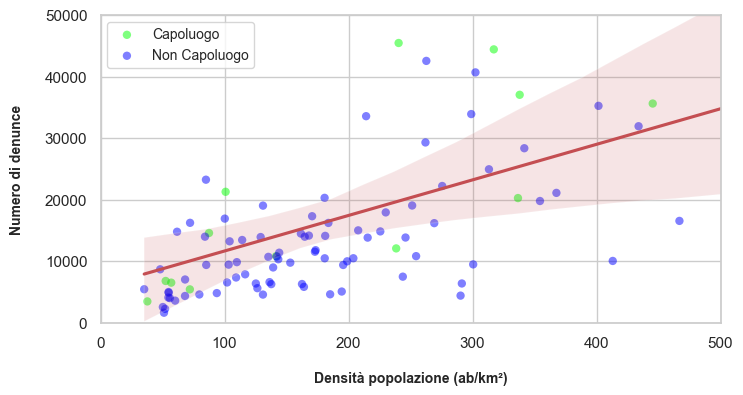

In [9]:
# --- Secondo grafico con margine di errore ---
plt.figure(figsize=(8, 4))

# Filtra i dati per Capoluogo e Non Capoluogo
df_capoluoghi = df_province[df_province['Capoluogo'] == 'SI']
df_non_capoluoghi = df_province[df_province['Capoluogo'] == 'NO']

# Grafico di dispersione per "Capoluogo" con alpha settato a 1 (completamente opaco)
sns.scatterplot(x='Densita', 
                y='Totale Generale Delitti', 
                data=df_capoluoghi, 
                color='#00FF00', 
                label='Capoluogo', 
                marker='o', 
                edgecolors='none',  # rimuove il bordo delle bolle
                alpha=0.5)  # Puoi cambiare questo valore per regolare la trasparenza

# Grafico di dispersione per "Non Capoluogo" con alpha settato a 1 (completamente opaco)
sns.scatterplot(x='Densita', 
                y='Totale Generale Delitti', 
                data=df_non_capoluoghi, 
                color='#0000FF', 
                label='Non Capoluogo', 
                marker='o', 
                edgecolors='none',  # rimuove il bordo delle bolle
                alpha=0.5)  # Puoi cambiare questo valore per regolare la trasparenza

# Aggiunge una linea di regressione con margine di errore (ci=95 per il Confidence Interval)
sns.regplot(x='Densita', 
            y='Totale Generale Delitti', 
            data=df_province, 
            scatter=False, 
            color='r', 
            ci=95)

# Imposta i limiti per zoomare sul grafico
plt.xlim(0, 500)
plt.ylim(0, 50000)

# Nomi degli assi e titolo
plt.xlabel('Densità popolazione (ab/km²)', labelpad=15, fontsize=10, fontweight='bold')
plt.ylabel('Numero di denunce', labelpad=15, fontsize=10, fontweight='bold')
plt.grid(True)

# Aggiunta della legenda personalizzata
plt.legend(loc='upper left', fontsize=10)

# Mostra il grafico
plt.show()

<h2><strong>3.4 Correlazione fra crimini e economia</strong></h2>
<ul>
        <li>Coefficiente di Pearson : 0.41, P-value : 1.11 x 10<sup>-5</sup></li>
</ul>

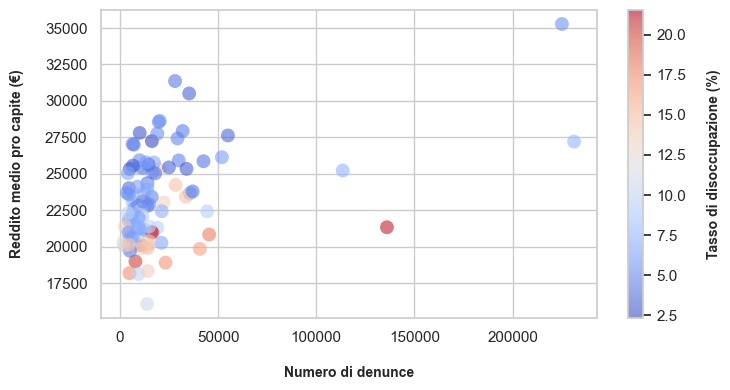

In [10]:
# Carica i dati per le regioni e le province
df_popolazione = pd.read_excel('Dataset/PopolazioneItalia_2022.xlsx', 'PopolazioneProvinciale')
df_delitti = pd.read_excel('Dataset/DelittiDenunciati_2022.xlsx', 'DenunceProvinciali')

# Rimuove le righe o colonne che contengono valori mancanti (NaN)
df_popolazione.dropna(inplace=True)
df_delitti.dropna(inplace=True)

# Unisce i due dataframe 
df_province = pd.merge(df_popolazione, df_delitti)

# Imposta il tema di Seaborn
sns.set(style="whitegrid")

# Crea il grafico a bolle
plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    df_province['Totale Generale Delitti'],  # x
    df_province['Reddito'],  # y
    s=100,  # dimensione delle bolle
    alpha=0.6,
    edgecolors='none',  # rimuove il bordo delle bolle
    cmap='coolwarm',  # colore delle bolle
    c=df_province['Disoccupazione']  # colore in base al tasso di disoccupazione
)

# Aggiunge etichette e titolo
plt.xlabel('Numero di denunce', labelpad=15, fontsize=10, fontweight='bold')
plt.ylabel('Reddito medio pro capite (€)', labelpad=15, fontsize=10, fontweight='bold')

# Aggiunge la barra del colore per il tasso di disoccupazione
cbar = plt.colorbar(scatter)
cbar.set_label('Tasso di disoccupazione (%)', labelpad=15, fontsize=10, fontweight='bold')

# Mostra il grafico
plt.show()

<h2><strong>4. Conclusioni</strong></h2>
<p> Cosa abbiamo scoperto?</p>
<ul>
    <li>I crimini contro il patrimonio sono i più frequenti e meno stabili nel tempo</li>
    <ul>
        <li>Truffe e frodi informatiche insieme ai furti presentano le maggiori variazioni nel tempo</li>
    </ul>
    <li>Maggiore incidenza di reati denunciati nel Lazio, seguito da Emilia-Romagna e Lombardia</li>
    <li>I furti sono i crimini più comuni in tutte le macroaree, seguiti dai danneggiamenti e dalle truffe e frodi informatiche</li>
    <li>La forte disparità territoriale ed economica contribuisce all'aumento dei crimini</li>
</ul>
<p>l'intero progetto è reperibile online alla pagina di Github @AlessioNicodemo </p>